In [1]:
!pip install opencv-python

In [2]:
import glob 
import cv2
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
lables = pd.read_csv("./dataset/labels.csv")

In [4]:
print(lables)

        name  category  type  grade
0      1.jpg         0     4      3
1      2.jpg         0     4      3
2      3.jpg         0     2      2
3      4.jpg         0     2      1
4      5.jpg         0     1      3
..       ...       ...   ...    ...
768  769.jpg         1     4      1
769  770.jpg         1     4      1
770  771.jpg         1     4      2
771  772.jpg         1     4      3
772  773.jpg         1     3      3

[773 rows x 4 columns]


In [5]:
labels_dict = dict(zip(lables.name, lables.category))

In [6]:
pattern = "./dataset/*/*"  

images = []
labels = []
for img in glob.glob(pattern):
    if img.endswith(".jpg") or img.endswith(".jpeg"):
        image = cv2.imread(img, 0)
        image = cv2.resize(image,(100,100))
        images.append(image)
        labels.append(labels_dict[img.split("\\")[-1]])
print(images[21],images[304],images[733])   

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 2 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]] [[16 15 20 ...  6  4  4]
 [16 18 16 ...  5  3  3]
 [14 17 19 ...  7  3  6]
 ...
 [ 3  3  5 ...  4  4  4]
 [ 4  4  6 ...  4  5  2]
 [ 3  5  3 ...  3  6  3]] [[46 52 54 ...  2  2  3]
 [48 54 60 ...  1  3  2]
 [50 54 60 ...  2  2  3]
 ...
 [35 41 42 ...  3  3  3]
 [34 37 40 ...  3  1  2]
 [33 36 49 ...  1  2  2]]


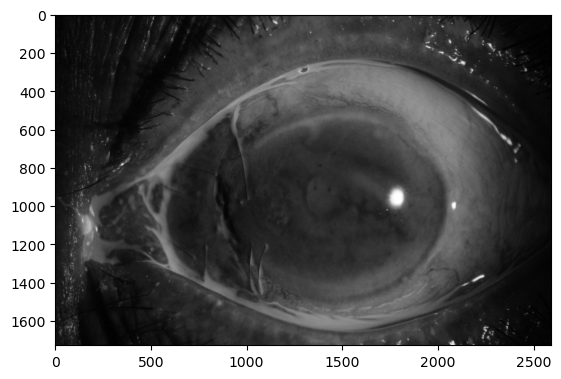

In [7]:
Sampleimg= cv2.imread('./dataset/images/716.jpg', 0)
plt.imshow(Sampleimg, cmap='gray')

In [8]:
val = []
label = []
for v, k in Counter(labels_dict.values()).items():
    if v == 0:
        label.append("No ulcer")
    elif v == 1:
        label.append("Micro punctate")
    elif v == 2:
        label.append("Macro punctate")
    val.append(k)

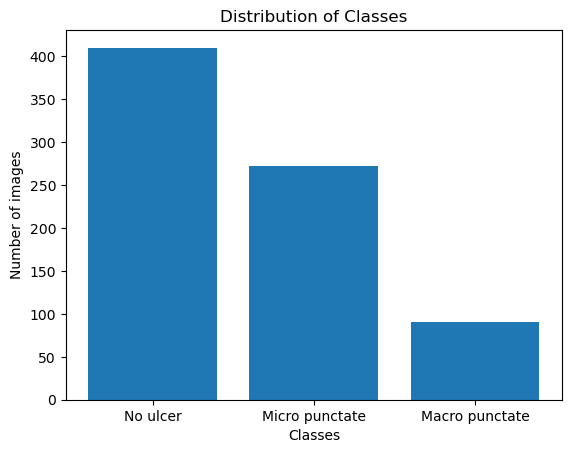

In [9]:
plt.bar(label, val)
plt.xlabel("Classes")
plt.ylabel("Number of images")
plt.title("Distribution of Classes")
plt.show()

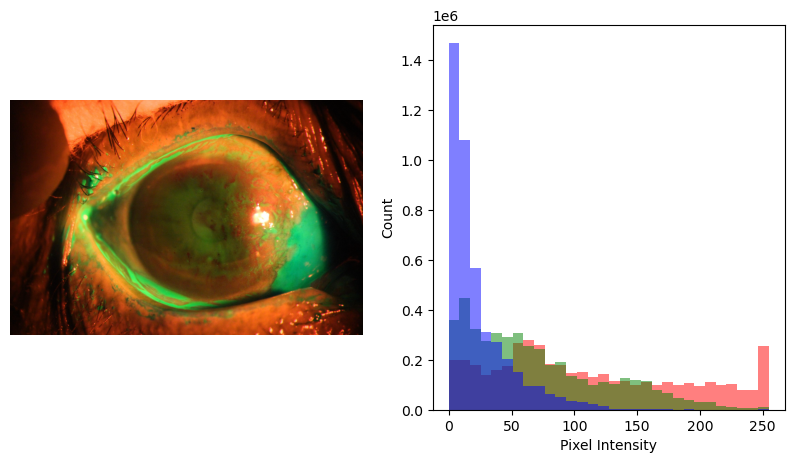

In [10]:
def plotHistogram(a):
    
    'Plot histogram of RGB Pixel Intensities'
    
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
    plt.show()

for img in glob.glob(pattern):
    if img.endswith(".jpg") or img.endswith(".jpeg"):
        image = cv2.imread(img)
        plotHistogram(image)
        break

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    images,
    labels,
    test_size=0.2,
    random_state=42,
)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (616, 100, 100)
y_train: (616,)
X_test: (154, 100, 100)
y_test: (154,)


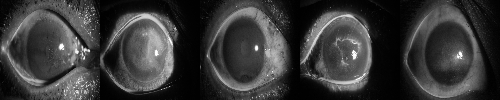

In [12]:
collage = np.hstack(images[30:35])
Image.fromarray(collage)
collage = np.hstack(images[20:25])
Image.fromarray(collage)
collage = np.hstack(images[10:15])
Image.fromarray(collage)

In [13]:
# reshaping the image data
X_train = X_train.reshape(X_train.shape[0], 10000)
X_test = X_test.reshape(X_test.shape[0], 10000)
print(X_train)

[[ 2  2  3 ...  1  2  1]
 [ 2  2  3 ...  1  1  1]
 [46 54 63 ...  4  4  3]
 ...
 [15 21 25 ...  1  1  1]
 [ 5  5  5 ...  1  2  1]
 [ 3  3  5 ...  1  1  1]]


In [22]:
class ML:
    def __init__(self, Xtrain, Ytrain, Xtest, Ytest):
        self.Xtrain = Xtrain
        self.Xtest = Xtest
        self.Ytrain = Ytrain
        self.Ytest = Ytest
        self.models()
    
    def models(self):
        self.logistic = LogisticRegression()
        self.svm = SVC(probability=True)
        self.bayes = GaussianNB()
        self.decisionTree = DecisionTreeClassifier()
        self.neighbor= KNeighborsClassifier(n_neighbors=8)
        self.kmeans=  KMeans(n_clusters=2)
        
    def train(self, model):
        self.model = model
        print("Training data for {}".format(model))
        self.model.fit(self.Xtrain, self.Ytrain)
        print("Training completed")
        return self.predicts()
    
    def predicts(self):
        ypred = self.model.predict(self.Xtest)
        print("Prediction is done")
        print("Accuracy Score : {}".format(accuracy_score(self.Ytest, ypred)))
        print("Classification Report")
        print(classification_report(self.Ytest, ypred))
        print("Confusion Matrix")
        df_cm = confusion_matrix(self.Ytest, ypred)
        sns.set(font_scale=1.4) 
        sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
        plt.show()
        return accuracy_score(self.Ytest, ypred)

In [23]:
# initialising the algorithms
algorithms = ML(X_train, y_train, X_test, y_test)

Training data for SVC(probability=True)
Training completed
Prediction is done
Accuracy Score : 0.7597402597402597
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        87
           1       0.69      0.72      0.71        50
           2       0.00      0.00      0.00        17

    accuracy                           0.76       154
   macro avg       0.50      0.55      0.52       154
weighted avg       0.67      0.76      0.71       154

Confusion Matrix


C:\Users\91801\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91801\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91801\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


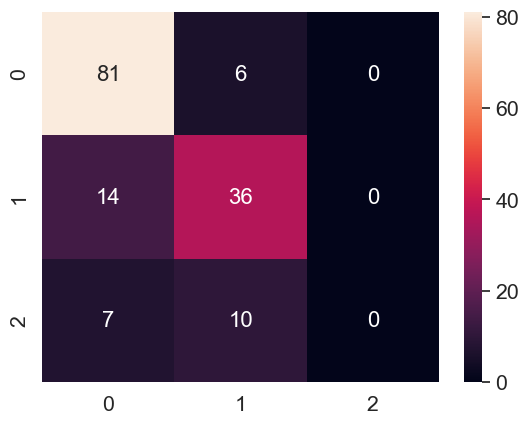

In [24]:
# training and evaluating SVM
svm_acc = algorithms.train(algorithms.svm)

Training data for LogisticRegression()
Training completed
Prediction is done
Accuracy Score : 0.5844155844155844
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.71      0.70        87
           1       0.48      0.50      0.49        50
           2       0.23      0.18      0.20        17

    accuracy                           0.58       154
   macro avg       0.47      0.46      0.46       154
weighted avg       0.58      0.58      0.58       154

Confusion Matrix


C:\Users\91801\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


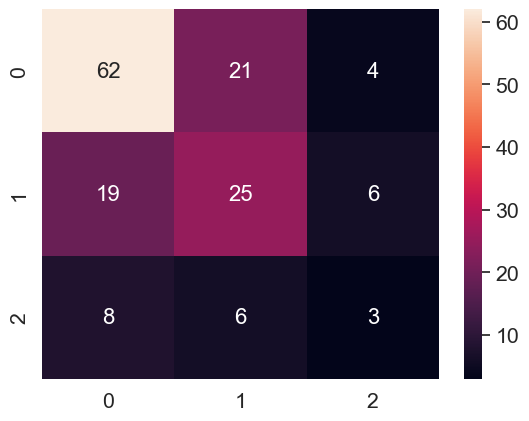

In [25]:
# training and evaluating logistic regression
Log_acc= algorithms.train(algorithms.logistic)


Training data for GaussianNB()
Training completed
Prediction is done
Accuracy Score : 0.5194805194805194
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.54      0.64        87
           1       0.40      0.42      0.41        50
           2       0.28      0.71      0.40        17

    accuracy                           0.52       154
   macro avg       0.49      0.56      0.49       154
weighted avg       0.61      0.52      0.54       154

Confusion Matrix


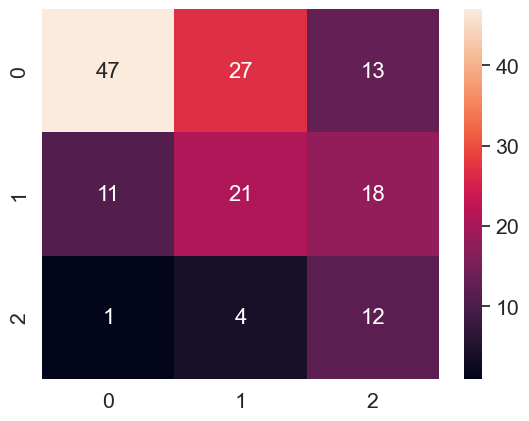

In [26]:
# training and evaluating naive bayes
Bayes_acc=algorithms.train(algorithms.bayes)

Training data for DecisionTreeClassifier()
Training completed
Prediction is done
Accuracy Score : 0.6103896103896104
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.71      0.75        87
           1       0.48      0.54      0.51        50
           2       0.26      0.29      0.28        17

    accuracy                           0.61       154
   macro avg       0.51      0.52      0.51       154
weighted avg       0.63      0.61      0.62       154

Confusion Matrix


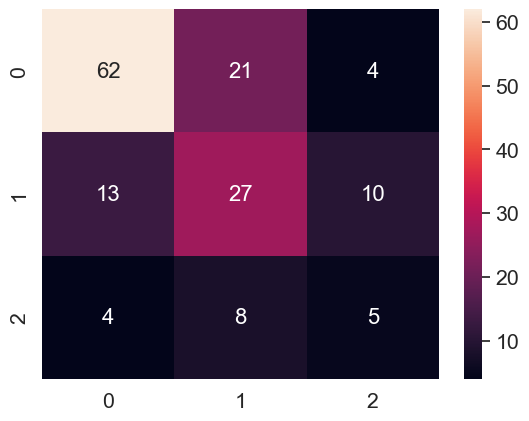

In [27]:
# training and evaluating decision tree
Dectree_acc=algorithms.train(algorithms.decisionTree)

Training data for KNeighborsClassifier(n_neighbors=8)
Training completed
Prediction is done
Accuracy Score : 0.7012987012987013
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.97      0.82        87
           1       0.70      0.46      0.55        50
           2       0.33      0.06      0.10        17

    accuracy                           0.70       154
   macro avg       0.58      0.49      0.49       154
weighted avg       0.67      0.70      0.65       154

Confusion Matrix


C:\Users\91801\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


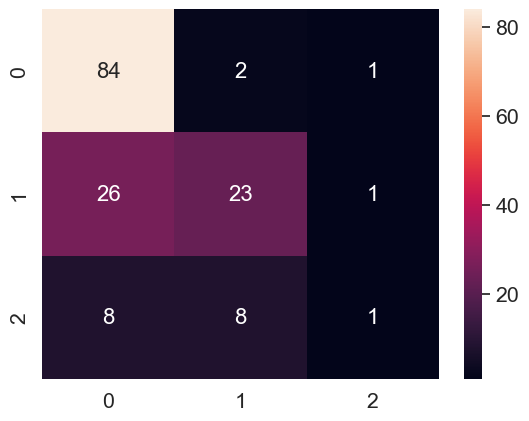

In [28]:
# training and evaluating KNN
knn_acc=algorithms.train(algorithms.neighbor)

In [40]:
x= ['SVM','Log','Bayes','Decision','KNN']
y= [svm_acc, Log_acc, Bayes_acc, Dectree_acc, knn_acc]

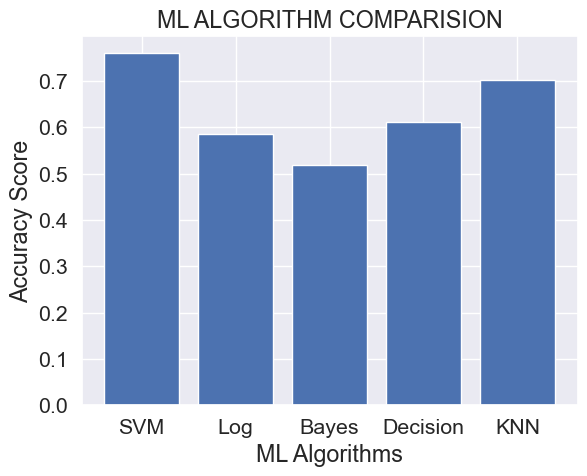

In [41]:
plt.bar(x,y)
plt.xlabel('ML Algorithms')
plt.ylabel('Accuracy Score')
plt.title('ML ALGORITHM COMPARISION')
plt.show()